<a href="https://colab.research.google.com/github/Tariq15994/Deep-learning/blob/master/houseP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House_Predictions using Boston_Housing Dataset with Regression Model

In [0]:
import numpy
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


In [0]:
# checking the shape of data
train_data.shape

(404, 13)

In [0]:
test_data.shape

(102, 13)

In [0]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

### preparing the data 
### Normalizing the Data
### feature-wise normalization i.e. (feature - mean)/ standard deviation using Numpy
### Using Normalization, to prevent hetrogenous ranges feeding to a Neural Network or to feed homogenous range (each feature close to zero) to a NN.

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0) 
train_data /= std


# Note: the quantities use for normalizing the test data, have been computed on train data (BEWARE: Never use computing on test data)

test_data -= mean 
test_data /= std

In [0]:
# checking normalized  train_data
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

### *Create Model*

In [0]:
from keras import models
from keras import layers

# For Reusability, model is defined as a function.
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(13, activation ="relu" ,input_shape=(len(train_data[1]),)))
  model.add(layers.Dense(1))   # No activation function
  model.compile(optimizer='rmsprop', loss='mse' , metrics=['mae'])
  return model

# Validation Step : Using K-fold Cross-Validation Method 

In [0]:
k = 10
num_of_sample = len(train_data) // 10
num_epochs = 100
all_scores = numpy.array([]) 
for i in range(k):
  print("Processing Fold ", i )
  # prepare the validation data: data from partition # k
  val_data = train_data[i * num_of_sample : (i + 1) * num_of_sample]
  val_targets = train_targets[i * num_of_sample : (i +1) * num_of_sample]

  # prepare the training data: data from data - k
  partial_train_data = numpy.concatenate([train_data[ : i * num_of_sample] , train_data[(i + 1) * num_of_sample : ]], axis=0)
  partial_train_targets = numpy.concatenate([train_targets[: i * num_of_sample] , train_targets[(i + 1) * num_of_sample : ]], axis=0)
  
  # Build the Keras Models (already commpiled)
  model = build_model() 
  # Train the model (in silence mode, verbose = 0)
  history1 = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs , batch_size = 5 , verbose = 0)
  # Evaluate the model on the validation data
  val_mse , val_mae = model.evaluate(val_data, val_targets, verbose = 0)

  all_scores =numpy.append(all_scores , val_mae)

('Processing Fold ', 0)
('Processing Fold ', 1)
('Processing Fold ', 2)
('Processing Fold ', 3)
('Processing Fold ', 4)
('Processing Fold ', 5)
('Processing Fold ', 6)
('Processing Fold ', 7)
('Processing Fold ', 8)
('Processing Fold ', 9)


In [0]:
# checking all_scores
all_scores

array([2.50839763, 1.87771444, 2.50331221, 2.68824387, 2.34513593,
       2.23643942, 2.51853919, 2.64422612, 3.76203594, 2.38394251])

# **Final Validation score**

In [0]:
# mean of all scores
all_scores.mean()     # we are still off by USDp 2531 on average

2.5312621212005615

###  Let’s try training the network a bit longer: 500 epochs. To keep a record of how
### well the model does at each epoch, you’ll modify the training loop to save the  perepoch validation score log.

In [0]:
# For Reusability, model is defined as a function.
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(13, activation ="relu" ,input_shape=(len(train_data[1]),)))
  model.add(layers.Dense(1))   # No activation function
  model.compile(optimizer='rmsprop', loss='mse' , metrics=['mae'])
  return model

In [0]:
# on fresh compile model
k = 10
num_of_sample = len(train_data) // 10
num_epochs = 500
all_val_histories = []
all_histories = []
all_scores = numpy.array([]) 
for i in range(k):
  print("Processing Fold ", i+1)
  # prepare the validation data: data from partition # k
  val_data = train_data[i * num_of_sample : (i + 1) * num_of_sample]
  val_targets = train_targets[i * num_of_sample : (i +1) * num_of_sample]

  # prepare the training data: data from data - k
  partial_train_data = numpy.concatenate([train_data[ : i * num_of_sample] , train_data[(i + 1) * num_of_sample : ]], axis=0)
  partial_train_targets = numpy.concatenate([train_targets[: i * num_of_sample] , train_targets[(i + 1) * num_of_sample : ]], axis=0)
  
  # Build the Keras Models (already commpiled)
  model = build_model() 
  # Train the model (in silence mode, verbose = 0)
  history2 = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets ) , epochs = num_epochs , batch_size = 5 , verbose = 0)
  val_mae = history2.history["val_mean_absolute_error"] 
  all_val_histories.append(val_mae)
  mae = history2.history['mean_absolute_error']
  all_histories.append(mae)

('Processing Fold ', 1)
('Processing Fold ', 2)
('Processing Fold ', 3)
('Processing Fold ', 4)
('Processing Fold ', 5)
('Processing Fold ', 6)
('Processing Fold ', 7)
('Processing Fold ', 8)
('Processing Fold ', 9)
('Processing Fold ', 10)


In [0]:
# val_mae


In [0]:
average_val_mae_history = [numpy.mean([x[i] for x in all_val_histories]) for i in range(num_epochs)]
# average_val_mae_history
average_mae_history  = [numpy.mean([x[i] for x in all_histories]) for i in range(num_epochs)]
# average_mae_history

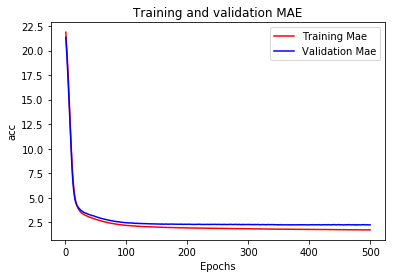

In [0]:
#Plotting the training and validation mae
import matplotlib.pyplot as plt
plt.clf()
mae_values = average_mae_history             
val_mae_values = average_val_mae_history  
epochs = range(1 , len(mae_values) + 1) 
plt.plot(epochs, mae_values, 'r-', label='Training Mae')
plt.plot(epochs, val_mae_values, 'b', label='Validation Mae')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

### It may be a little difficult to see the plot, due to scaling issues and relatively high variance. Let’s do the following:
###  Omit the first 10 data points, which are on a different scale than the rest of the curve.
###  Replace each point with an exponential moving average of the previous points,to obtain a smooth curve.

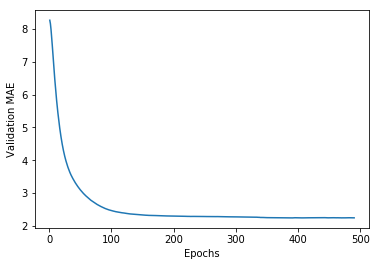

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_val_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Plotting validation scores and traning scores, excluding the first 10 data points

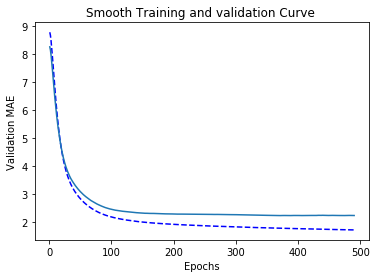

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
smooth_val_mae_history = smooth_curve(average_val_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history , 'b--' , label="Traning Mae")
plt.plot(range(1, len(smooth_val_mae_history) + 1), smooth_val_mae_history , label='Validation Mae' )
plt.title('Smooth Training and validation Curve ')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
# evaluate on test data
test_mse , test_mae = model.evaluate(test_data , test_targets) 

102/102 [==============================] - 0s 128us/step


[15.233063192928538, 2.5446563328013703]

In [0]:
test_mae # We are still off $ 2544

# **Training the final model**

In [0]:
# Get a fresh compiled model.
model = build_model()

#Training on Entire Data
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

W0227 06:16:17.534657 140690857142144 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0227 06:16:17.544315 140690857142144 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0227 06:16:17.569932 140690857142144 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0227 06:16:17.665415 140690857142144 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0227 06:16:17.671556 140690857142144 module_wrapper.py:139] From /usr/local/lib/python2.

102/102 [==============================] - 0s 265us/step


#**Final Result**

In [0]:
test_mae_score

4.113408116733327